--------------------



**Project Description** 

Create a program that builds an oracle for a given string **(e.g given 01101, will return a QuantumCircuit that inverts the phase of the state |01101)** and leaves all other states unchanged.




--------------

**1. Libraries**

In [52]:
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library.standard_gates import XGate

-----------------------------------

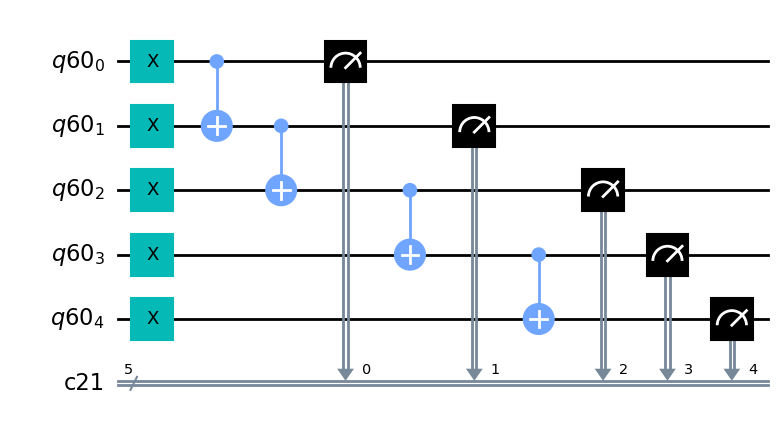

In [50]:
targets = "01101"
n = len(targets)

qcircuit = QuantumRegister(n)
ccircuit = ClassicalRegister(n)
circuit = QuantumCircuit(qcircuit,ccircuit)

# XGate.. 
for i, bit in enumerate(targets):
    circuit.x(qcircuit[i])  

#CXGate
for i in range(n-1): 
    circuit.cx(qcircuit[i], qcircuit[i + 1])

    
# "Let's Save All the Measured Values in the CBit."
for i in range(n):
    circuit.measure(qcircuit[i], ccircuit[i])


circuit.draw("mpl")

In [53]:
# Get Result and Print Screen
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

print("Classical Bit Value:", counts)

Classical Bit Value: {'10101': 1024}
